In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

from pathlib import Path

In [16]:
import os

try:
    os.mkdir("images")
except FileExistsError:
    print("images already exists, not overriding")

images already exists, not overriding


In [17]:
plt.rcParams['text.usetex'] = True

In [18]:
def load_data(direction, polarization, calc_method): 
    directory = Path(direction, polarization, calc_method)
    lam = np.genfromtxt(directory / "lambda.txt")
    power = np.genfromtxt(directory / "power.txt")
    fx = np.genfromtxt(directory / "fx.txt") / power
    fy = np.genfromtxt(directory / "fy.txt") / power
    fz = np.genfromtxt(directory / "fz.txt") / power

    return lam, power, fx, fy, fz

def g_factor(f_lcp, f_rcp):
    # g-factor of optical force per Okamoto sensei's paper
    return 2 * (np.abs(f_lcp) - np.abs(f_rcp)) / (np.abs(f_lcp) + np.abs(f_rcp))

In [19]:
# lambda_lcp_mst, power_lcp_mst, fx_lcp_mst, fy_lcp_mst, fz_lcp_mst = load_data("LCP", "MST")
# lambda_rcp_mst, power_rcp_mst, fx_rcp_mst, fy_rcp_mst, fz_rcp_mst = load_data("RCP", "MST")
# lambda_lp_mst, power_lp_mst, fx_lp_mst, fy_lp_mst, fz_lp_mst = load_data("LP", "MST")

direction = "forward"
method = "volumetric"
lam, _, fx_lcp, fy_lcp, fz_lcp = load_data(direction, "LCP", method)
_, _, fx_rcp, fy_rcp, fz_rcp = load_data(direction, "RCP", method)
# lambda_lp_vol, power_lp_vol, fx_lp_vol, fy_lp_vol, fz_lp_vol = load_data("LP", "volumetric")

_, _, fx_lp, fy_lp, fz_lp = load_data("backward", "LP", method)

# Fx

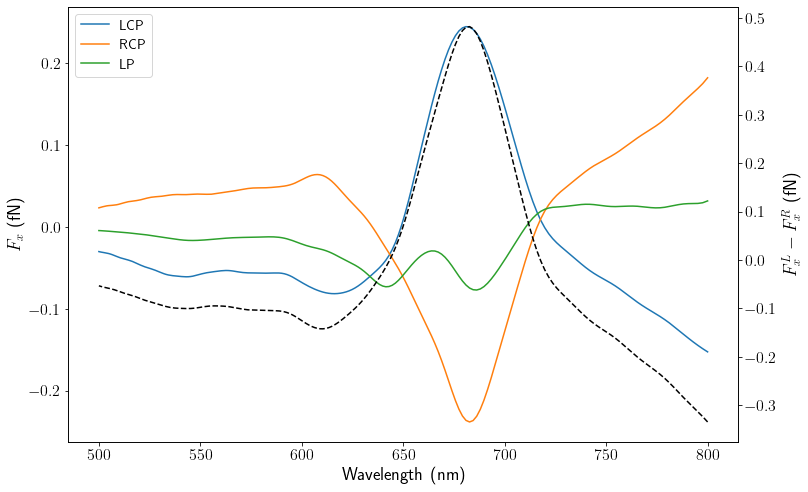

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(lam * 1e9, fx_lcp * 10e-6 * 1e15, label="LCP", zorder=1)
ax1.plot(lam * 1e9, fx_rcp * 10e-6 * 1e15, label="RCP", zorder=2)
ax1.plot(lam * 1e9, -fx_lp * 10e-6 * 1e15, label="LP", zorder=3)
# ax.plot(lambda_lp_mst * 1e9, fx_lp_mst, label="LP")
ax1.set_xlabel(r"Wavelength (nm)", fontsize=18)
ax1.set_ylabel(r"$F_x$ (fN)", fontsize=18)
ax1.tick_params(labelsize=16)
ax1.legend(fontsize=14, loc=2)

ax2 = ax1.twinx()
ax2.plot(lam * 1e9, (fx_lcp - fx_rcp) * 10e-6 * 1e15, c="k", ls="--", zorder=4)
ax2.set_ylabel(r"$F_x^L - F_x^R$ (fN)", fontsize=18)
ax2.tick_params(labelsize=16)

plt.savefig("images/fx.png")
plt.show()

In [21]:
print(lam[np.argmax(np.abs(fx_lcp - fx_rcp))])

6.82676e-07


# Fy

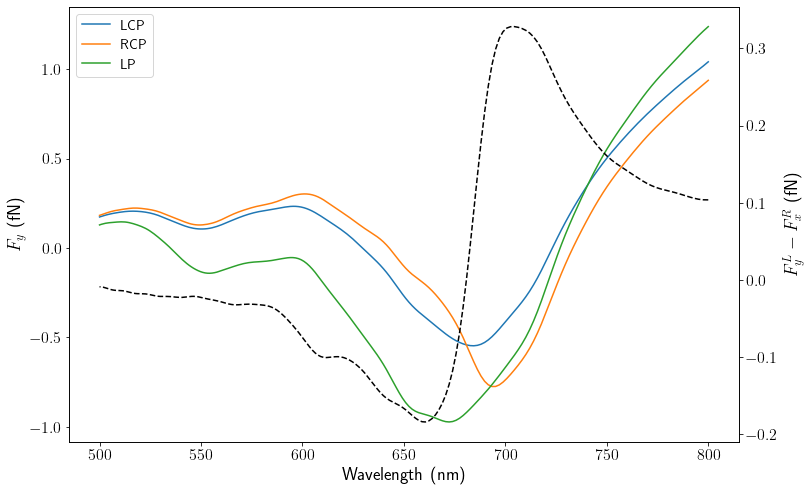

In [22]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(lam * 1e9, fy_lcp * 10e-6 * 1e15, label="LCP", zorder=1)
ax1.plot(lam * 1e9, fy_rcp * 10e-6 * 1e15, label="RCP", zorder=2)
ax1.plot(lam * 1e9, fy_lp * 10e-6 * 1e15, label="LP", zorder=3)
# ax.plot(lambda_lp_mst * 1e9, fx_lp_mst, label="LP")
ax1.set_xlabel(r"Wavelength (nm)", fontsize=18)
ax1.set_ylabel(r"$F_y$ (fN)", fontsize=18)
ax1.tick_params(labelsize=16)
ax1.legend(fontsize=14, loc=2)

ax2 = ax1.twinx()
ax2.plot(lam * 1e9, (fy_lcp - fy_rcp) * 10e-6 * 1e15, c="k", ls="--", zorder=4)
ax2.set_ylabel(r"$F_y^L - F_x^R$ (fN)", fontsize=18)
ax2.tick_params(labelsize=16)

plt.savefig("images/fy.png")
plt.show()

In [23]:
print(lam[np.argmax(np.abs(fy_lcp - fy_rcp))])

7.04425e-07


# Fz

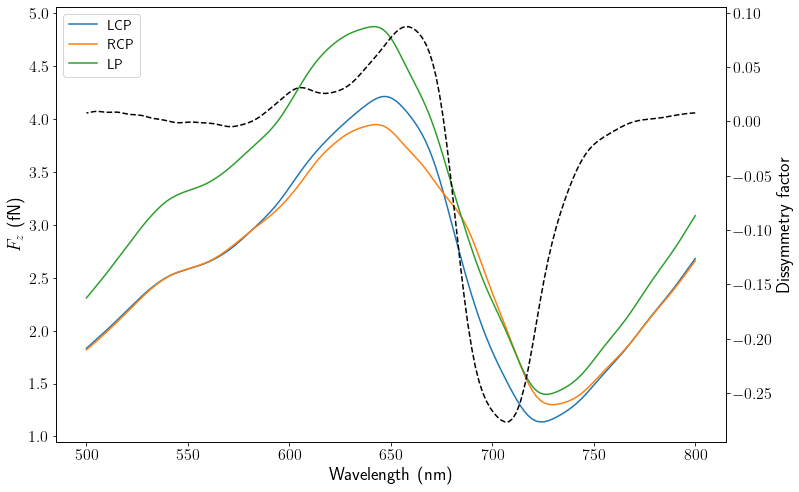

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(lam * 1e9, fz_lcp * 10e-6 * 1e15, label="LCP", zorder=1)
ax1.plot(lam * 1e9, fz_rcp * 10e-6 * 1e15, label="RCP", zorder=2)
ax1.plot(lam * 1e9, -fz_lp * 10e-6 * 1e15, label="LP", zorder=3)
# ax.plot(lambda_lp_mst * 1e9, fx_lp_mst, label="LP")
ax1.set_xlabel(r"Wavelength (nm)", fontsize=18)
ax1.set_ylabel(r"$F_z$ (fN)", fontsize=18)
ax1.tick_params(labelsize=16)
ax1.legend(fontsize=14, loc=2)

ax2 = ax1.twinx()
ax2.plot(lam * 1e9, g_factor(fz_lcp, fz_rcp), c="k", ls="--", zorder=4)
ax2.set_ylabel(r"Dissymmetry factor", fontsize=18)
ax2.tick_params(labelsize=16)

plt.savefig("images/fz.png")
plt.show()

In [ ]:
print(lam[np.argmax(np.abs(fy_lcp - fy_rcp))])